In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from diffprivlib.models import GaussianNB

In [10]:
dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)
df= pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                 columns= dataset['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(dataset.target, dataset.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [15]:
clf = GaussianNB()
clf.fit(X_train, y_train)

C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:100: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
           bounds=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])))

In [16]:
clf.predict(X_test)

array([1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1,
       1, 2, 0, 1, 1, 0, 2, 0])

In [17]:
print("Test accuracy: %f" % clf.score(X_test, y_test))

Test accuracy: 0.733333


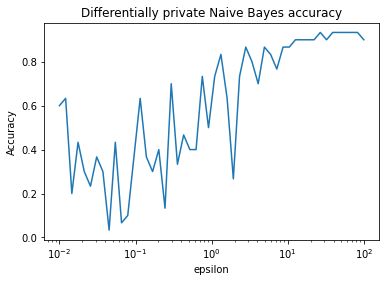

In [22]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

 have not been specified and will be calculated on the data provided. This will "
C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:100: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:100: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\dhh3hb\Anaconda3\lib\site-packages\diffpriv

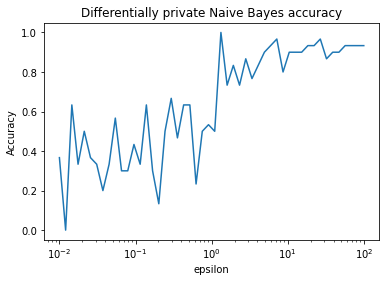

In [23]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
# bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB(epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()